In [1]:
import sidewalkify as swky
import osmnx as ox
import numpy as np
import pandas as pd
import networkx as nx
import shapely as shapely
import geopandas as gpd


ModuleNotFoundError: No module named 'sidewalkify'

In [2]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

<ipython-input-2-7721cd5e3608>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook
/home/adam/.local/lib/python3.8/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Get the initial road map
Here's what osmnx thinks of as 'walking':

In [3]:
ox.downloader._get_osm_filter("walk")

'["area"!~"yes"]["highway"!~"cycleway|motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["service"!~"private"]["access"!~"private"]'

In [4]:
brighton_streets = gpd.read_file("brighton_streets.shp")

In [5]:
brighton_streets

,u,v,key,id,name,highway,length,sw_left,sw_right,geometry
0,61341700,61501744,0,8647362,Arlington Street,residential,76.015,1,1,"LINESTRING (-71.15443 42.35240, -71.15377 42.3..."
1,61341700,61364860,0,8647362,Arlington Street,residential,74.786,1,1,"LINESTRING (-71.15443 42.35240, -71.15494 42.3..."
2,61341700,61341804,0,8652176,Parsons Street,residential,64.389,1,1,"LINESTRING (-71.15443 42.35240, -71.15423 42.3..."
3,61341700,61465472,0,8652176,Parsons Street,residential,97.572,1,1,"LINESTRING (-71.15443 42.35240, -71.15479 42.3..."
4,61341708,61456343,0,8639525,Camelot Court,residential,210.911,1,1,"MULTILINESTRING ((-71.14007 42.35033, -71.1402..."
...,...,...,...,...,...,...,...,...,...,...
2047,61341692,61341752,0,591284846,Faneuil Street,tertiary,34.195,1,1,"LINESTRING (-71.16472 42.35211, -71.16510 42.3..."
2048,61341692,61456997,0,8636146,Dunboy Street,residential,122.939,1,1,"LINESTRING (-71.16472 42.35211, -71.16478 42.3..."
2049,61341693,61342144,0,591284846,Faneuil Street,tertiary,23.184,1,1,"LINESTRING (-71.16318 42.35241, -71.16290 42.3..."
2050,61341693,61342336,0,591284846,Faneuil Street,tertiary,37.354,1,1,"LINESTRING (-71.16318 42.35241, -71.16362 42.3..."


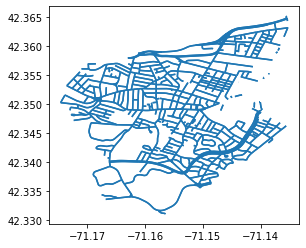

In [6]:
brighton_streets.plot()

In [7]:
print(brighton_streets.crs)
EPSG_4326 = brighton_streets.crs

epsg:4326


In [8]:
def multis_to_lines(ls_or_mls):
    if type(ls_or_mls) == shapely.geometry.LineString:
        return [ls_or_mls]
    else:
        return list(ls_or_mls)
    
df_temp = pd.DataFrame(brighton_streets)
df_temp['geometry'] = df_temp['geometry'].map(multis_to_lines)
df_temp = df_temp.explode('geometry')
brighton_streets = gpd.GeoDataFrame(df_temp, geometry='geometry')
brighton_streets.crs = EPSG_4326
brighton_streets

,u,v,key,id,name,highway,length,sw_left,sw_right,geometry
0,61341700,61501744,0,8647362,Arlington Street,residential,76.015,1,1,"LINESTRING (-71.15443 42.35240, -71.15377 42.3..."
1,61341700,61364860,0,8647362,Arlington Street,residential,74.786,1,1,"LINESTRING (-71.15443 42.35240, -71.15494 42.3..."
2,61341700,61341804,0,8652176,Parsons Street,residential,64.389,1,1,"LINESTRING (-71.15443 42.35240, -71.15423 42.3..."
3,61341700,61465472,0,8652176,Parsons Street,residential,97.572,1,1,"LINESTRING (-71.15443 42.35240, -71.15479 42.3..."
4,61341708,61456343,0,8639525,Camelot Court,residential,210.911,1,1,"LINESTRING (-71.14007 42.35033, -71.14023 42.3..."
...,...,...,...,...,...,...,...,...,...,...
2047,61341692,61341752,0,591284846,Faneuil Street,tertiary,34.195,1,1,"LINESTRING (-71.16472 42.35211, -71.16510 42.3..."
2048,61341692,61456997,0,8636146,Dunboy Street,residential,122.939,1,1,"LINESTRING (-71.16472 42.35211, -71.16478 42.3..."
2049,61341693,61342144,0,591284846,Faneuil Street,tertiary,23.184,1,1,"LINESTRING (-71.16318 42.35241, -71.16290 42.3..."
2050,61341693,61342336,0,591284846,Faneuil Street,tertiary,37.354,1,1,"LINESTRING (-71.16318 42.35241, -71.16362 42.3..."


In [9]:
EPSG_26919 = "EPSG:26919"
brighton_streets = brighton_streets.to_crs(EPSG_26919)

In [10]:
sidewalk_paths = swky.graph.graph_workflow(brighton_streets)

In [11]:
brighton_sidewalks = swky.draw.draw_sidewalks(sidewalk_paths)
brighton_sidewalks.crs=EPSG_26919

  4%|▍         | 12/302 [00:00<00:16, 17.34it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/adam/anaconda3/envs/insight_project_dc/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-2db9d62cac41>", line 1, in <module>
    brighton_sidewalks = swky.draw.draw_sidewalks(sidewalk_paths)
  File "/home/adam/anaconda3/envs/insight_project_dc/lib/python3.8/site-packages/sidewalkify/draw/draw.py", line 26, in draw_sidewalks
    edge['sidewalk'] = edge_to_sidewalk_geom(edge)
  File "/home/adam/anaconda3/envs/insight_project_dc/lib/python3.8/site-packages/sidewalkify/draw/draw.py", line 10, in edge_to_sidewalk_geom
    geom = edge['geometry'].parallel_offset(offset, 'left',
  File "/home/adam/.local/lib/python3.8/site-packages/shapely/geometry/linestring.py", line 145, in parallel_offset
    return geom_factory(self.impl['parallel_offset'](
  File "/home/adam/.local/lib/python3.8/site-packages/shapely/topology.py", line 78, i

KeyboardInterrupt: 

In [ ]:
brighton_sidewalks.to_file("brighton_sidewalks")
brighton_streets.to_file("brighton_streets_26919")

In [ ]:
import math
def linestring_start(linestring):
    (l1,l2) = list(linestring.coords)[0]
    return (l1,l2)

def linestring_end(linestring):
    (l1,l2) = list(linestring.coords)[1]
    return (l1,l2)

def linestring_heading(linestring):
    # 0 is true north, 90 is east
    # so heading = 90 - usual_angle (in standard form)
    (l1,l2) = linestring_start(linestring)
    (m1,m2) = linestring_end(linestring)
    angle_deg = math.atan2(m2-l2, m1-l1) * 360 / (2 * math.pi)
    heading_deg = int((90 - angle_deg) % 360)
    return(heading_deg)

# probably need to rework this for GSV, ok
brighton_streets['heading'] = brighton_streets.geometry.map(linestring_heading)


Let's segment.

In [ ]:
brighton_streets

In [ ]:
brighton_streets = brighton_streets.to_crs(EPSG_4326)
brighton_streets['length'] = brighton_streets.to_crs("EPSG:26919").length
brighton_streets['ratio'] = brighton_streets.length/brighton_streets['length']
brighton_streets['ratio'].describe()

0.000011 seems reasonable

In [ ]:
import math
CUT_LENGTH_METERS = 8
CUT_LENGTH = 0.000011 * CUT_LENGTH_METERS
sum((brighton_streets.length/CUT_LENGTH).map(math.ceil))

In [ ]:
brighton_streets = brighton_streets.drop(columns=['ratio','highway','key'])

In [ ]:
brighton_streets

In [ ]:
# Thank you Sean Gilles https://gist.github.com/sgillies/465156#file_cut.py
from shapely.geometry import LineString, Point

def cut(line, distance):
    # Cuts a line in two at a distance from its starting point
    if distance <= 0.0 or distance >= line.length:
        return [LineString(line)]
    coords = list(line.coords)
    for i, p in enumerate(coords):
        pd = line.project(Point(p))
        if pd == distance:
            return [
                LineString(coords[:i+1]),
                LineString(coords[i:])]
        if pd > distance:
            cp = line.interpolate(distance)
            return [
                LineString(coords[:i] + [(cp.x, cp.y)]),
                LineString([(cp.x, cp.y)] + coords[i:])]
        

# here's me
def recursive_cut(line, distance):
    if [line] == cut(line, distance):
        return [line]
    else:
        segment, rest = cut(line, distance)
        return [segment] + recursive_cut(rest, distance)

In [ ]:
# now we recursive_cut streets
brighton_streets_segmented = brighton_streets.copy()
brighton_streets_segmented['segments'] = brighton_streets.geometry.map(lambda x : recursive_cut(x,CUT_LENGTH))

df_temp = pd.DataFrame(brighton_streets_segmented)
df_temp = df_temp.explode('segments').drop(columns=['geometry'])
brighton_streets_segmented = gpd.GeoDataFrame(df_temp, geometry = 'segments')
brighton_streets_segmented.crs = EPSG_4326

In [ ]:
brighton_streets_segmented.length

In [ ]:
# get midpoints to figure out where to take photo
def midpoint(linestring):
    (x1,y1) = linestring_start(linestring)
    (x2,y2) = linestring_end(linestring)
    x_mid = (x2 + x1)/2
    y_mid = (y2 + y1)/2
    return Point(x_mid, y_mid)

brighton_streets_segmented['midpoints'] = brighton_streets_segmented.geometry.map(midpoint)

In [ ]:
list(brighton_streets_segmented.head(1)['segments'].values[0].coords)

Plan:
* feed each row to selenium
* * two pics, left and right
* * cut off for 'short' ones -- can add 'length_4269' to see where
* project little lines out and clip/delete bad sidewalks

In [ ]:
brighton_crosswalks = gpd.read_file("brighton_crosswalks/brighton_crosswalks.shp")

In [ ]:
brighton_crosswalks

In [2]:
!which python

/home/adam/anaconda3/envs/insight_dash/bin/python
